# EDA

## IMPORT PACKAGES


In [1]:
import sys
import os
sys.path.append(os.path.abspath('..')) 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from janitor import clean_names
from paths import (
    TRANSFORMED_DATA_DIR,
    VALIDATION_DIR
)

# Quick autocompletion
%config IPCompleter.greedy=True

## IMPORT DATA

In [2]:
cat = pd.read_parquet(TRANSFORMED_DATA_DIR / 'cat_result_quality.parquet')
num = pd.read_parquet(TRANSFORMED_DATA_DIR / 'num_result_quality.parquet')

## EDA CATEGORICAL

### Statistical Analysis

We do not include the variable 'd' because it will have too many values.

In [3]:
cat

,store_id,item_id,d,year,month,wday,weekday,event_name_1,event_type_1
date,,,,,,,,,
2013-01-01,CA_3,FOODS_3_090,d_704,2013,1,4,Tuesday,NewYear,National
2013-01-01,CA_3,FOODS_3_120,d_704,2013,1,4,Tuesday,NewYear,National
2013-01-01,CA_3,FOODS_3_202,d_704,2013,1,4,Tuesday,NewYear,National
2013-01-01,CA_3,FOODS_3_252,d_704,2013,1,4,Tuesday,NewYear,National
2013-01-01,CA_3,FOODS_3_288,d_704,2013,1,4,Tuesday,NewYear,National
...,...,...,...,...,...,...,...,...,...
2015-11-30,CA_4,FOODS_3_329,d_1767,2015,11,3,Monday,None,None
2015-11-30,CA_4,FOODS_3_555,d_1767,2015,11,3,Monday,None,None
2015-11-30,CA_4,FOODS_3_586,d_1767,2015,11,3,Monday,None,None


In [4]:
cat.columns.to_list()

['store_id',
 'item_id',
 'd',
 'year',
 'month',
 'wday',
 'weekday',
 'event_name_1',
 'event_type_1']

In [5]:
#filtered_cat = cat.drop(columns=['id', 'dept_id', 'cat_id', 'state_id'])

In [6]:
#filtered_cat.columns.to_list()

In [7]:
include = cat.columns.to_list()
del include[2]

In [8]:
include

['store_id',
 'item_id',
 'year',
 'month',
 'wday',
 'weekday',
 'event_name_1',
 'event_type_1']

In [9]:
def frequency_cat(df_cat):
    # Ensure all columns are of type 'str' to avoid comparison issues
    df_cat = df_cat.astype(str)
    
    result = (df_cat
              .apply(lambda x: x.value_counts(normalize=True))
              .T
              .stack()
              .reset_index()
              .rename(columns={'level_0': 'Variable', 'level_1': 'Value', 0: "Frequency"})
              .sort_values(by=['Variable', 'Frequency']))
    return result

In [10]:
pd.set_option('display.max_rows', None)

frequency_cat(cat[include])

,Variable,Value,Frequency
41,event_name_1,Chanukah End,0.001880
42,event_name_1,Christmas,0.001880
43,event_name_1,Cinco De Mayo,0.001880
48,event_name_1,Father's day,0.001880
62,event_name_1,OrthodoxEaster,0.001880
44,event_name_1,ColumbusDay,0.002820
45,event_name_1,Easter,0.002820
46,event_name_1,Eid al-Fitr,0.002820
47,event_name_1,EidAlAdha,0.002820
49,event_name_1,Halloween,0.002820


In [11]:
pd.set_option('display.max_rows', 6)

### Graphical Analysis

In [12]:
def graphic_eda_categorical(cat):
    
    #Calculate the number of rows we need
    from math import ceil
    rows = ceil(cat.shape[1] / 2)

    #Define the graph
    f, ax = plt.subplots(nrows = rows, ncols = 2, figsize = (16, rows * 6))

    #Flatten to iterate over the graph as if it were a 1D instead of 2D
    ax = ax.flat 

    #Create the loop that adds graphs
    for each, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[each])
        ax[each].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[each].tick_params(labelsize = 12)

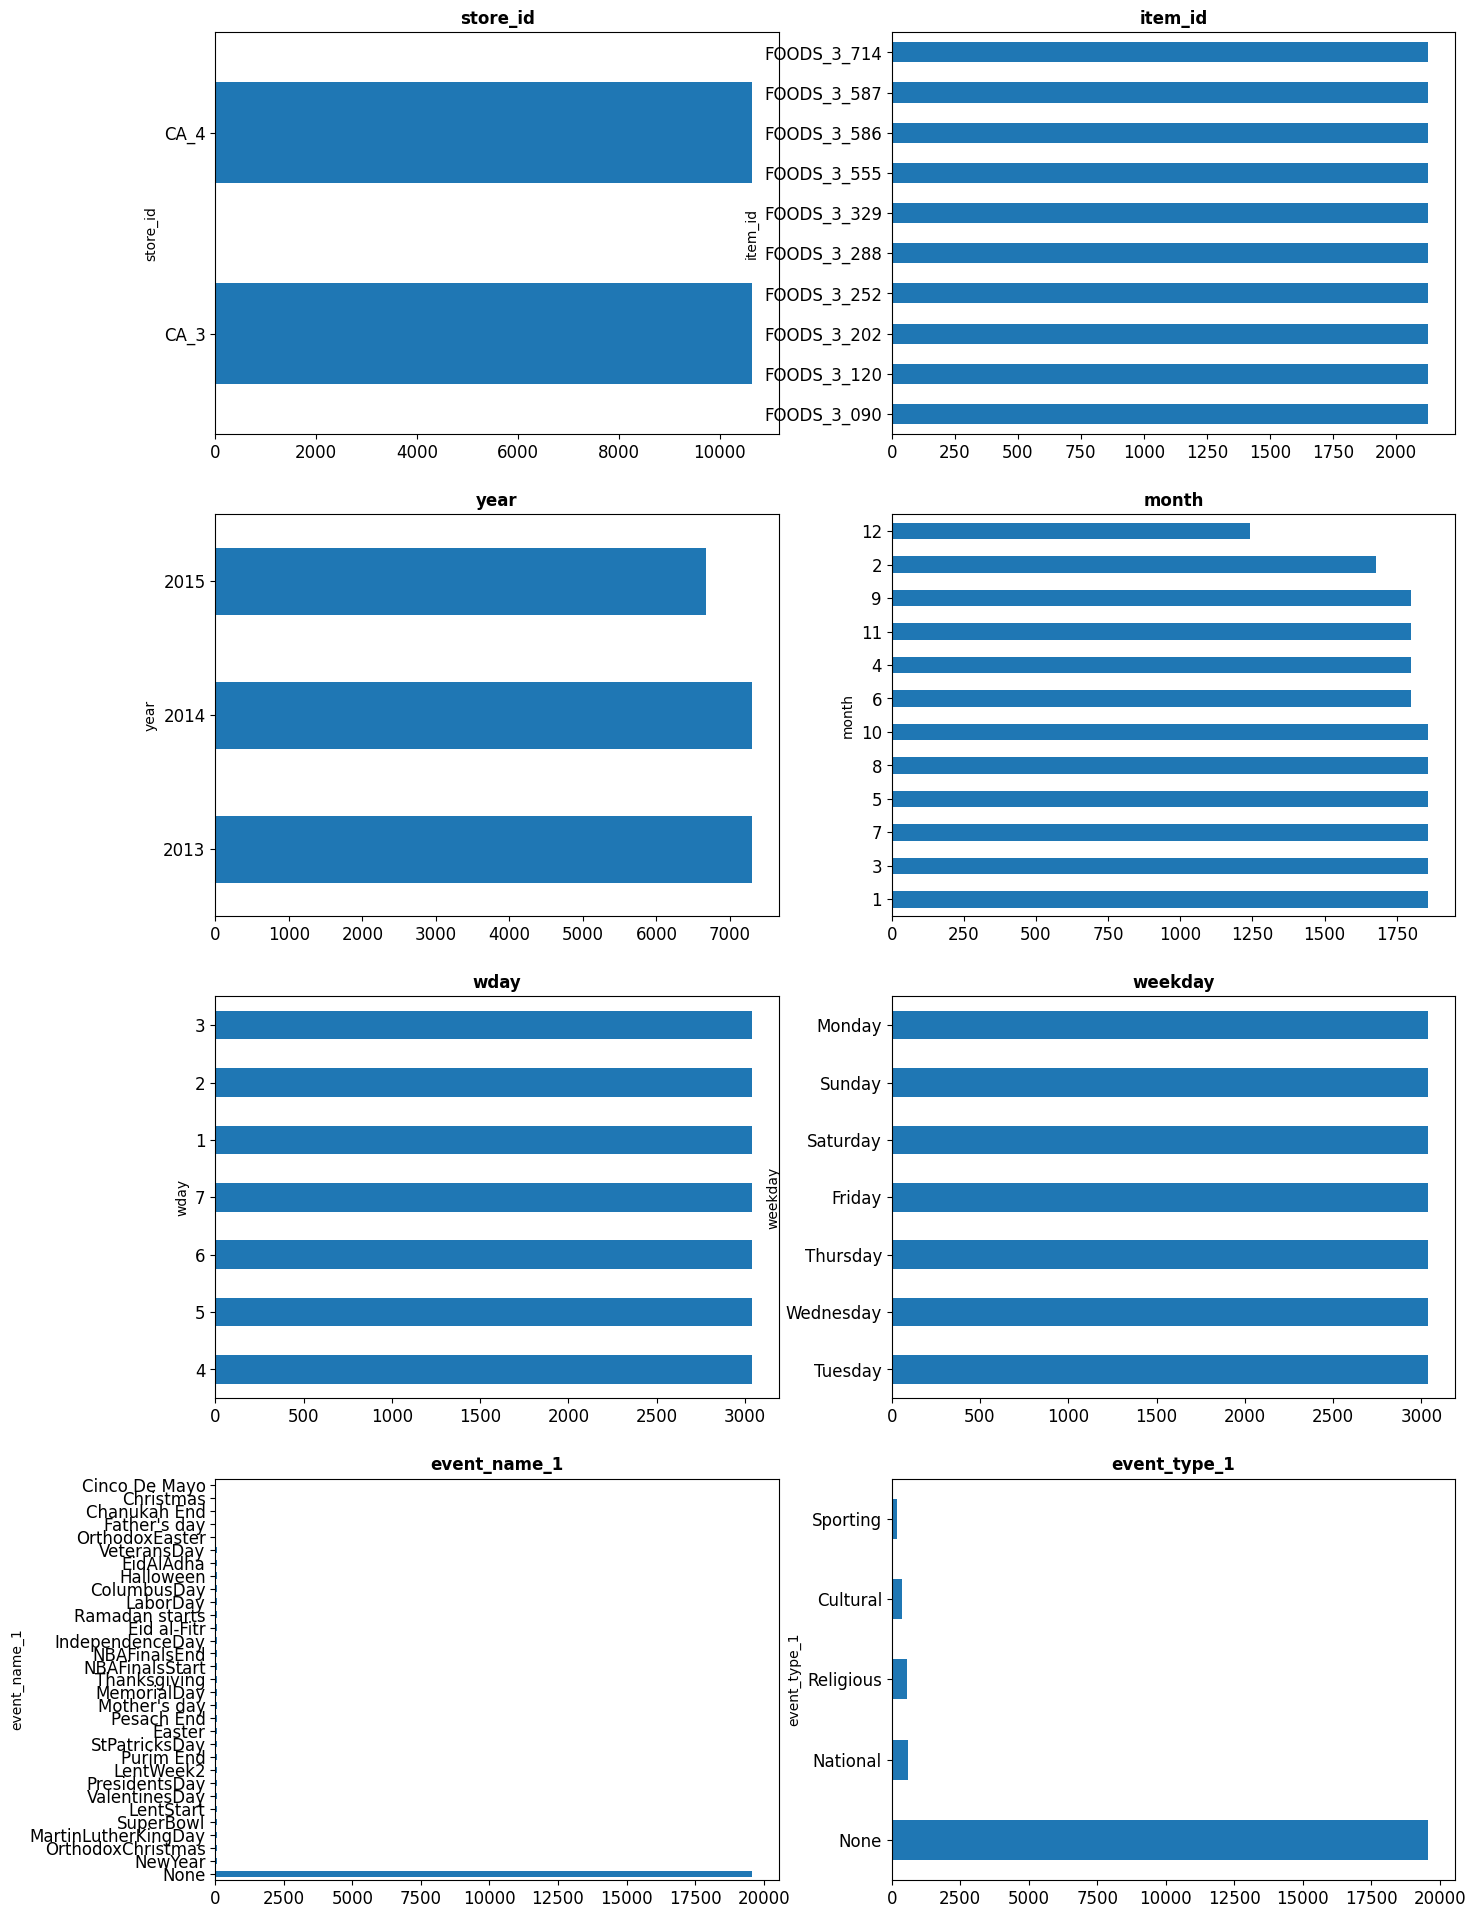

In [13]:
graphic_eda_categorical(cat[include])

## EDA NUMERICAL

### Statistical Analysis

In [14]:
def statistical_analysis(num):
    #Calculate describe
    statistics = num.describe().T
    #Add the median
    statistics['median'] = num.median()
    #Reorder to have the median next to the mean
    statistics = statistics.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Return
    return(statistics)

In [15]:
statistical_analysis(num)

,count,mean,median,std,min,25%,50%,75%,max
wm_yr_wk,21280.0,11415.022556,11420.00,82.874752,11249.0,11335.0,11420.00,11506.00,11544.00
sales,21280.0,28.874577,18.00,38.988147,0.0,6.0,18.00,37.00,763.00
sell_price,21280.0,2.394261,1.58,1.236042,1.0,1.5,1.58,2.98,4.98


### Graphical Analysis

In this case, the graphical analysis that makes the most sense is the analysis of sales and prices by different dimensions.

So first we need to join the two dataframes again.

In [16]:
# Drop the 'id' column and reorganize the columns using chaining
df = pd.concat([cat, num], axis=1)

df.head()

,store_id,item_id,d,year,month,wday,weekday,event_name_1,event_type_1,wm_yr_wk,sales,sell_price
date,,,,,,,,,,,,
2013-01-01,CA_3,FOODS_3_090,d_704,2013,1,4,Tuesday,NewYear,National,11249,0,1.25
2013-01-01,CA_3,FOODS_3_120,d_704,2013,1,4,Tuesday,NewYear,National,11249,33,1.25
2013-01-01,CA_3,FOODS_3_202,d_704,2013,1,4,Tuesday,NewYear,National,11249,0,4.98
2013-01-01,CA_3,FOODS_3_252,d_704,2013,1,4,Tuesday,NewYear,National,11249,0,4.98
2013-01-01,CA_3,FOODS_3_288,d_704,2013,1,4,Tuesday,NewYear,National,11249,20,4.28


#### Sales Trend

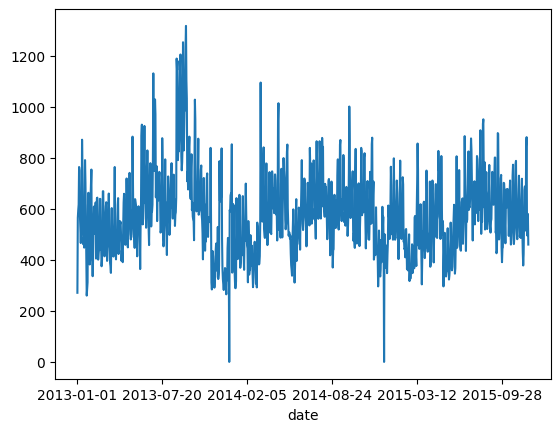

In [17]:
df.groupby('date').sales.sum().plot();

#### Sales by Product Tendency

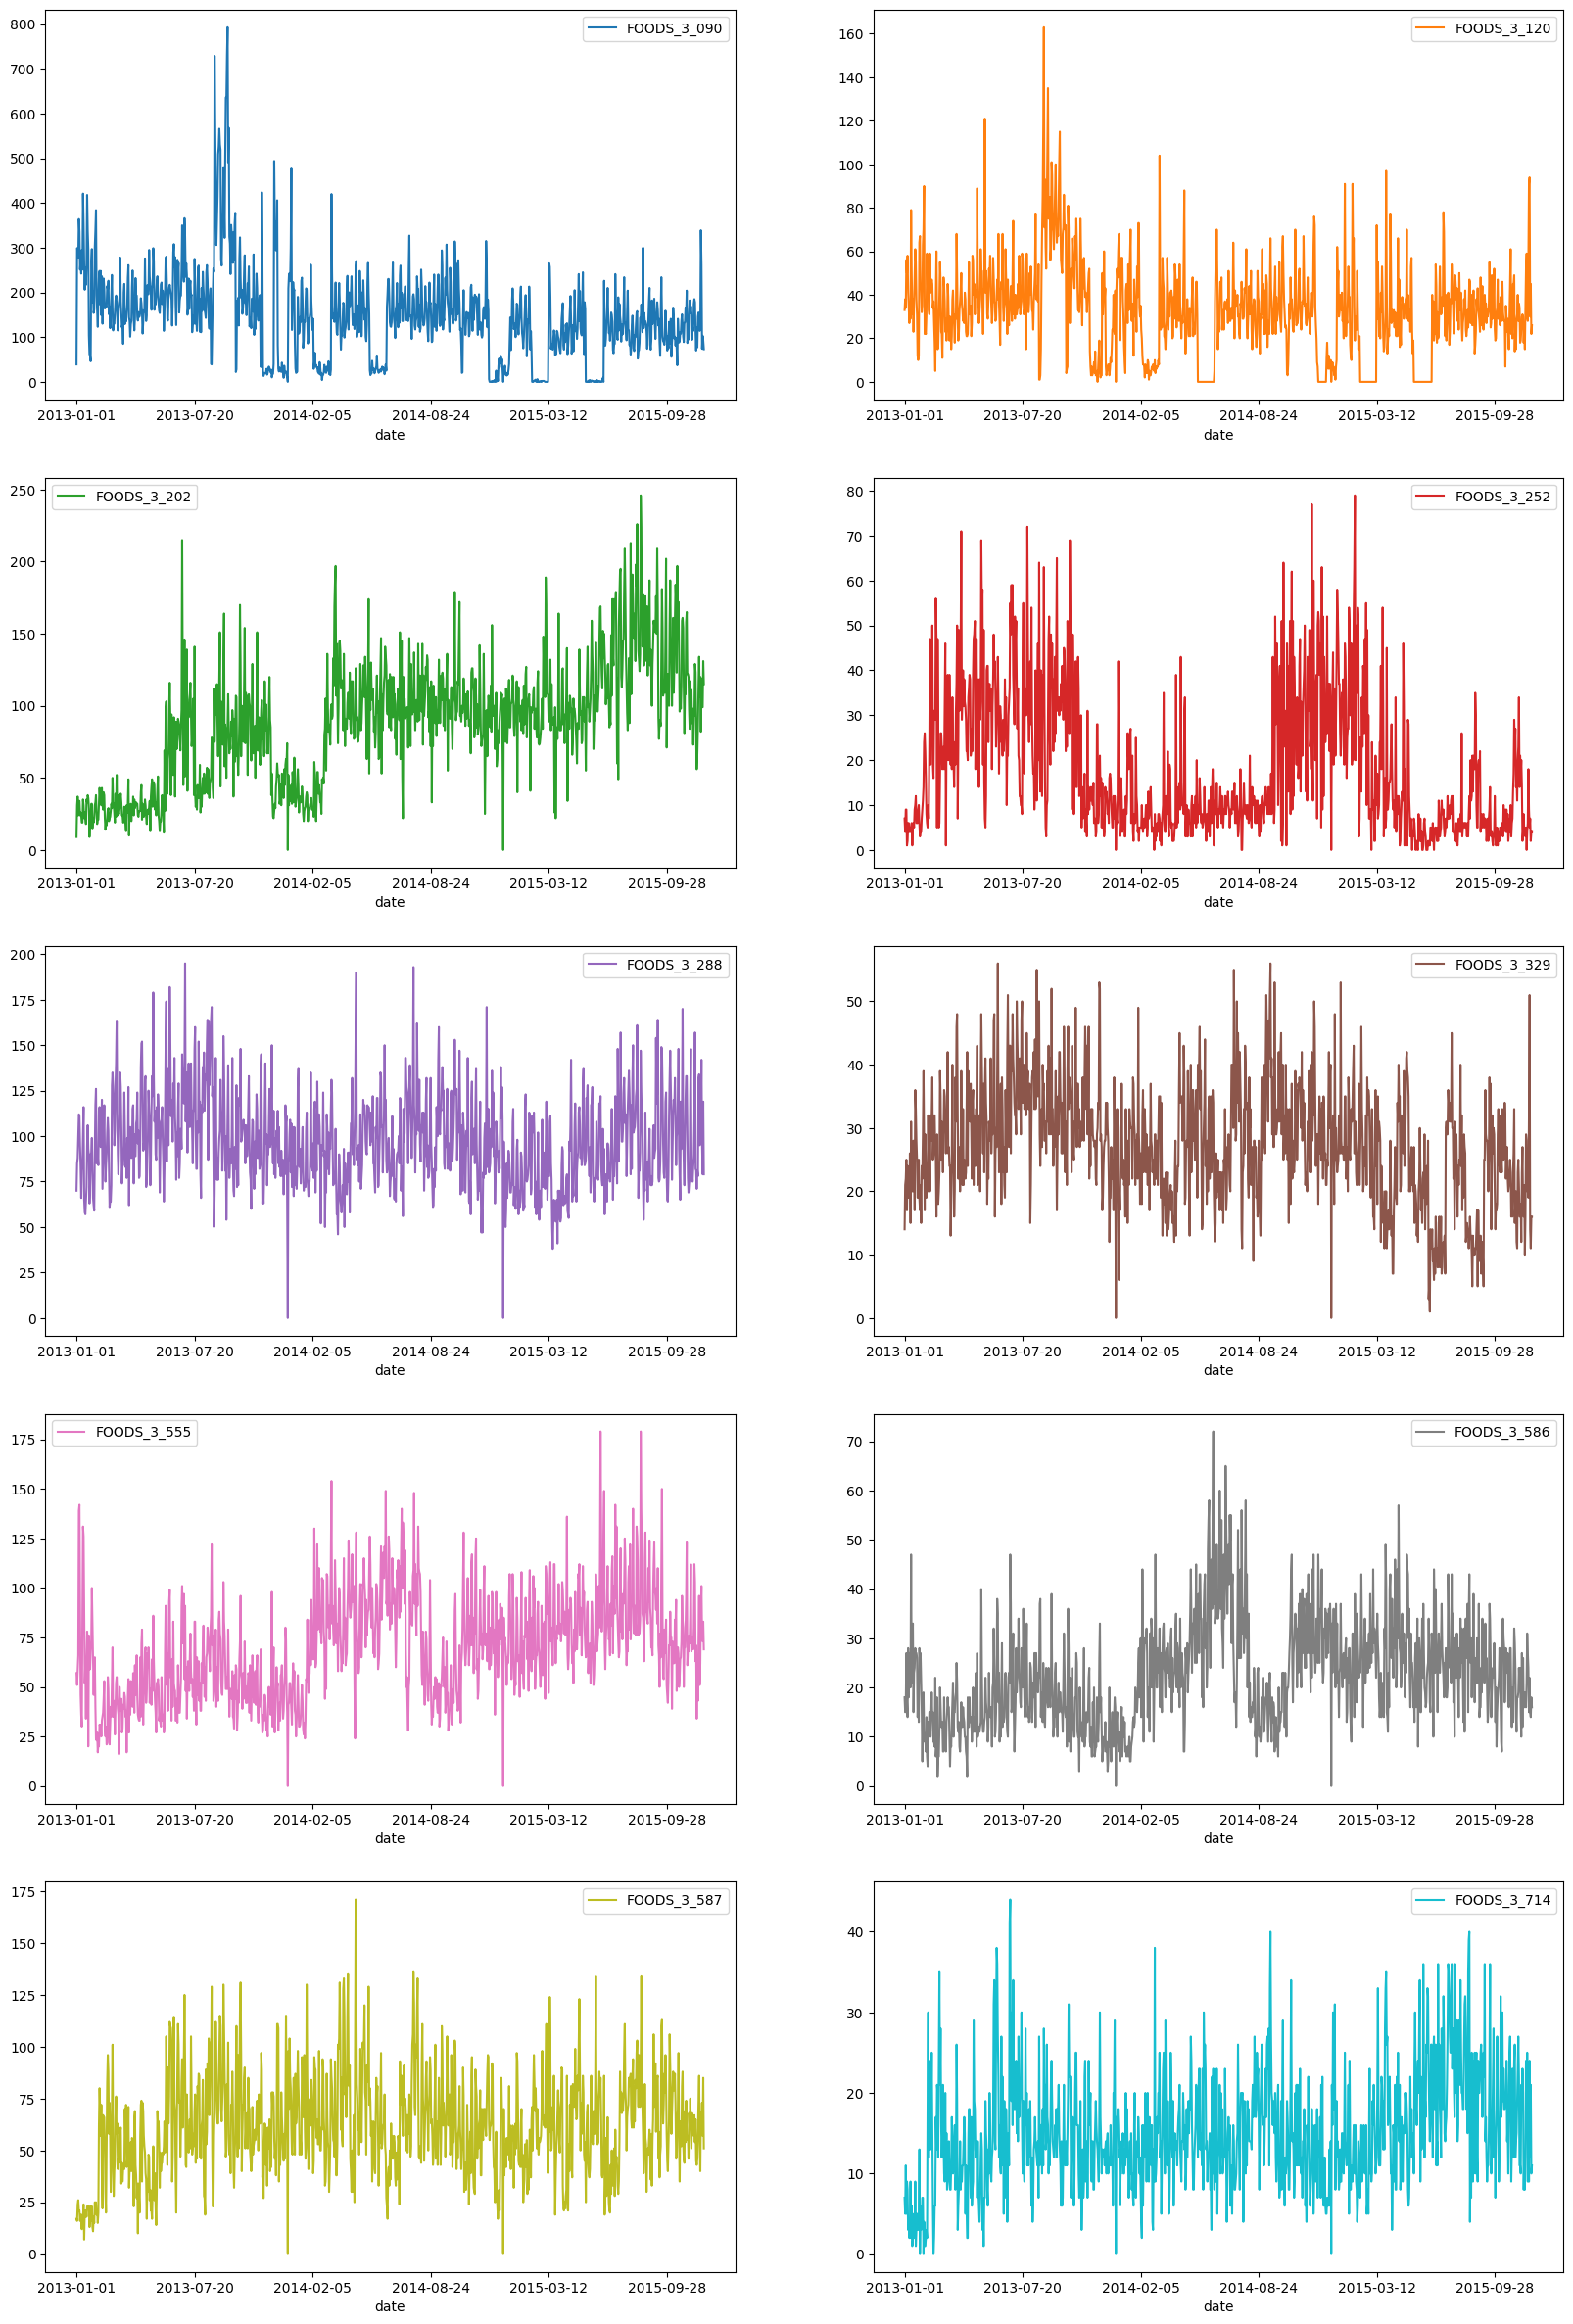

In [18]:
df.groupby(['date','item_id']).sales.sum().unstack().plot(subplots = True,  layout = (5,2), sharex=False, figsize=(20,30));

#### Sales by Store and Product Tendency

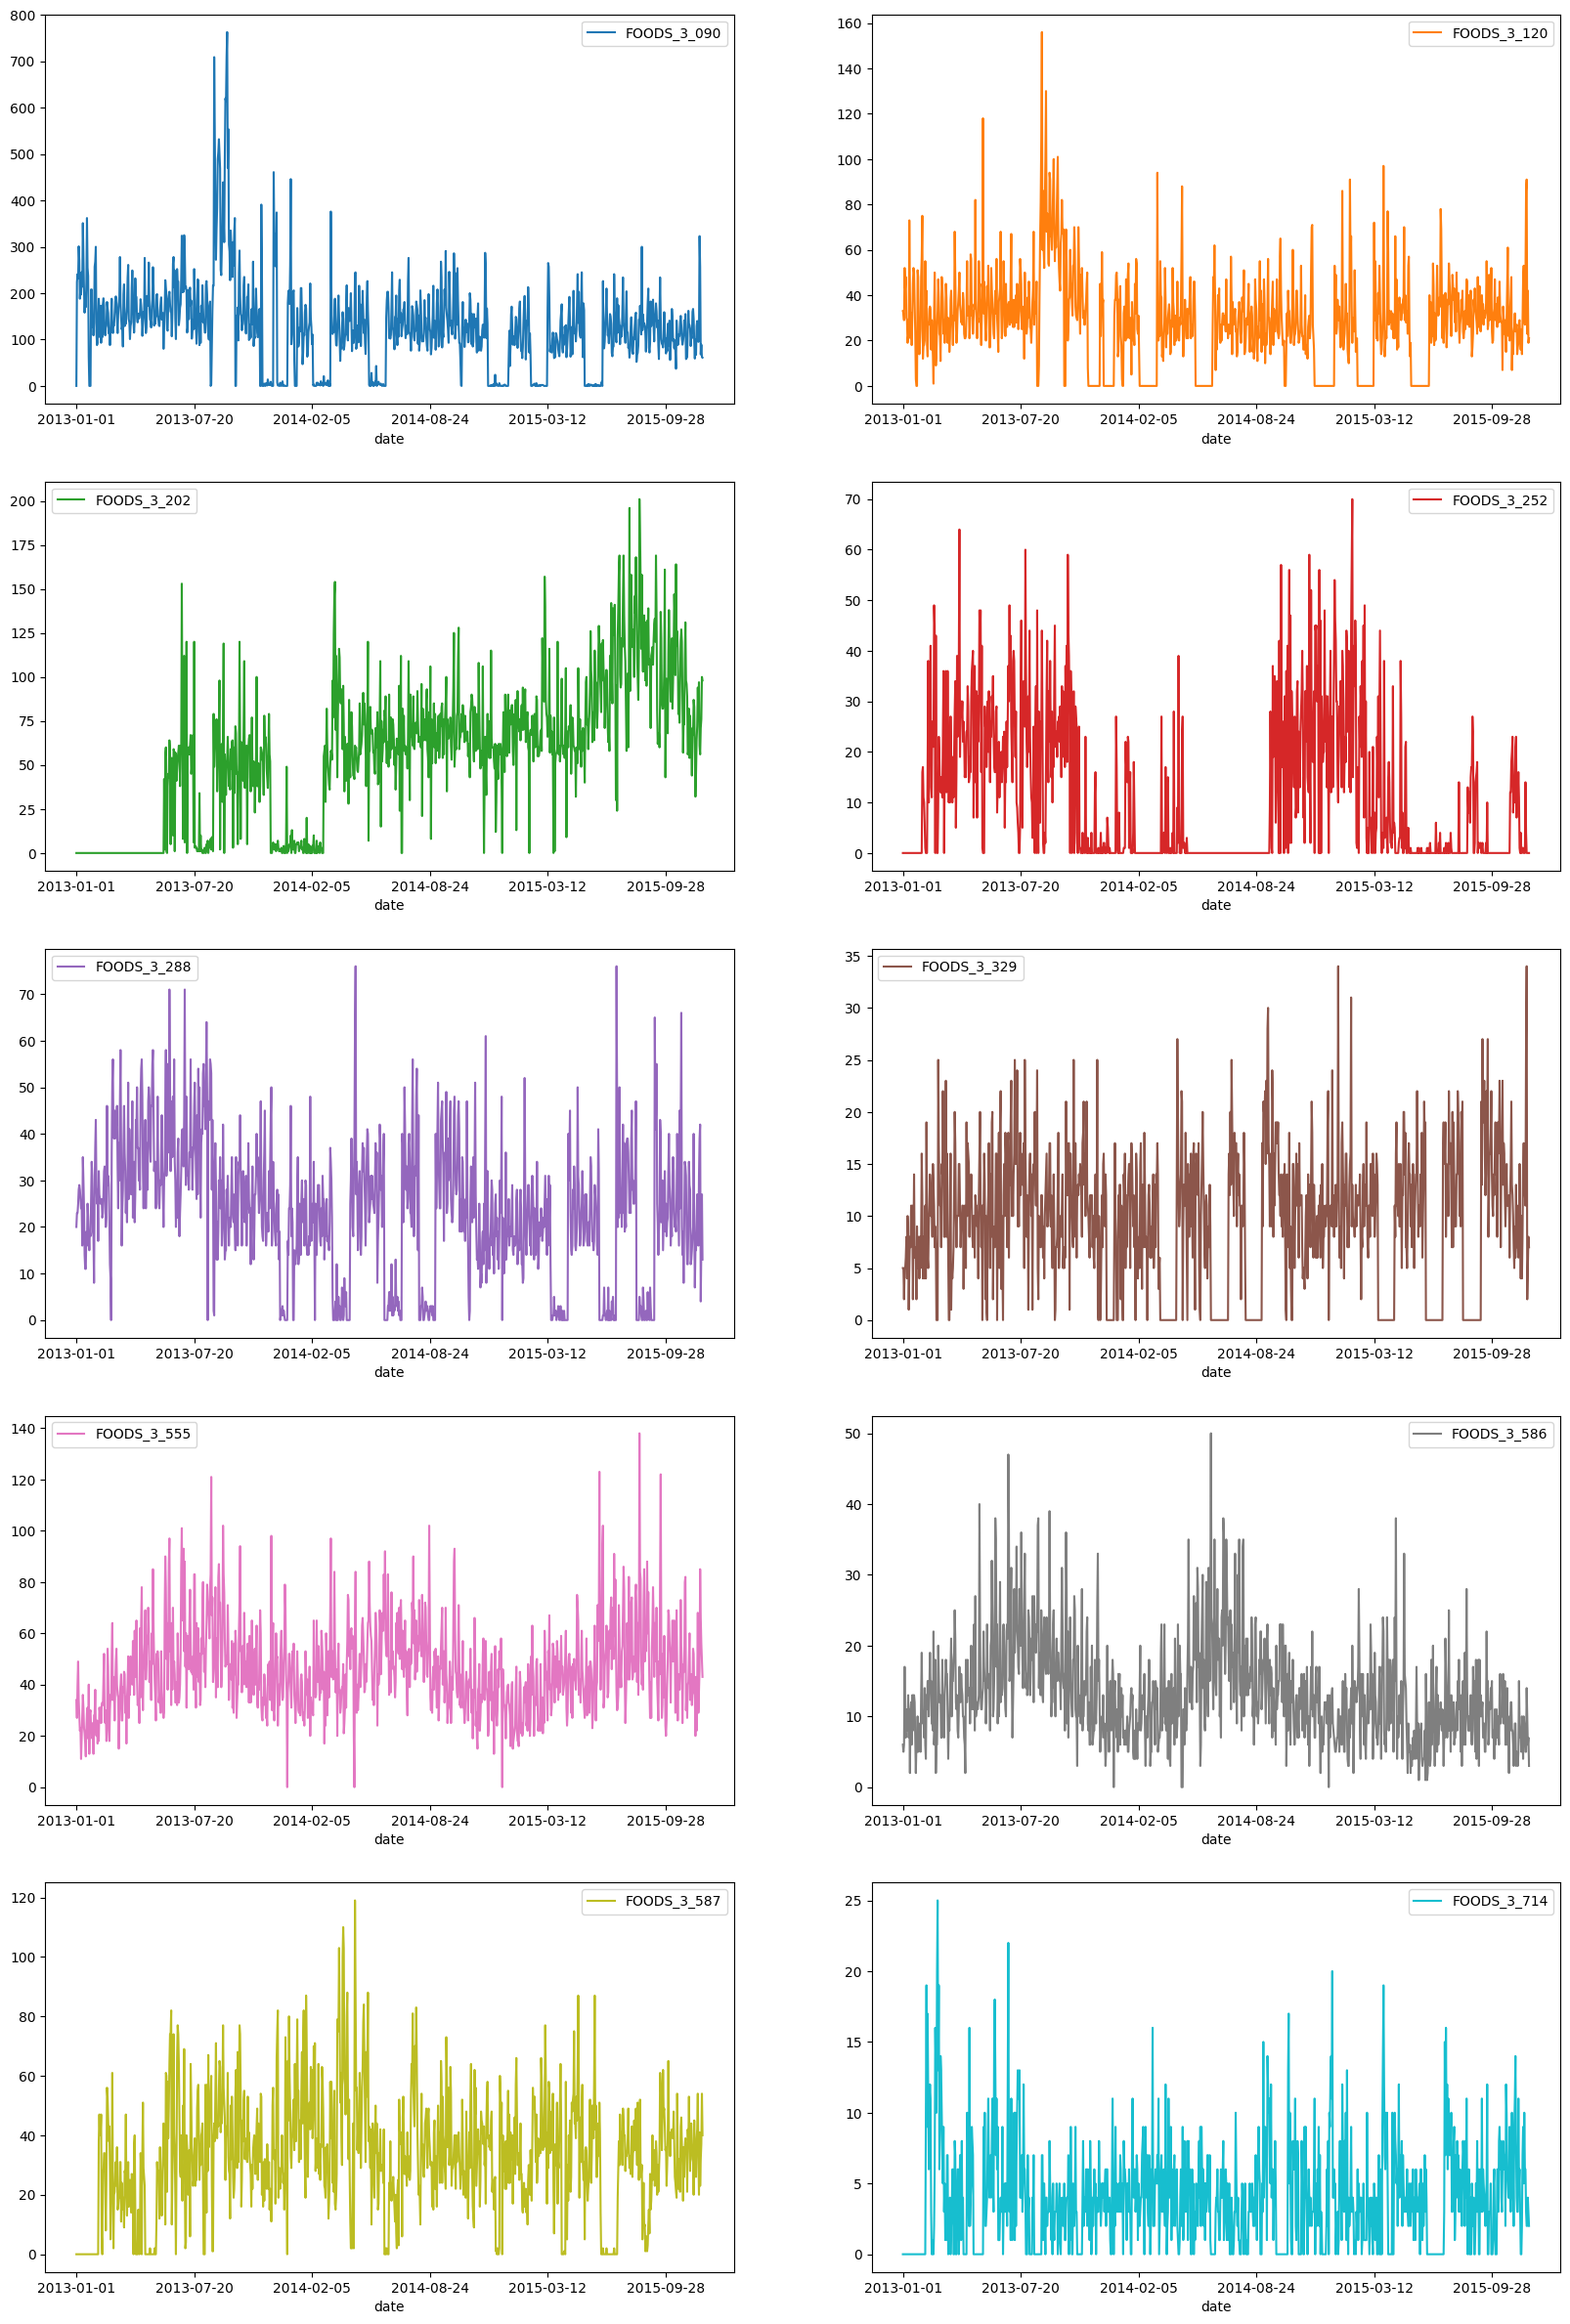

In [19]:
df.loc[df.store_id == 'CA_3'].groupby(['date','item_id']).sales.sum().unstack().plot(subplots = True,  layout = (5,2), sharex=False, figsize=(20,30));

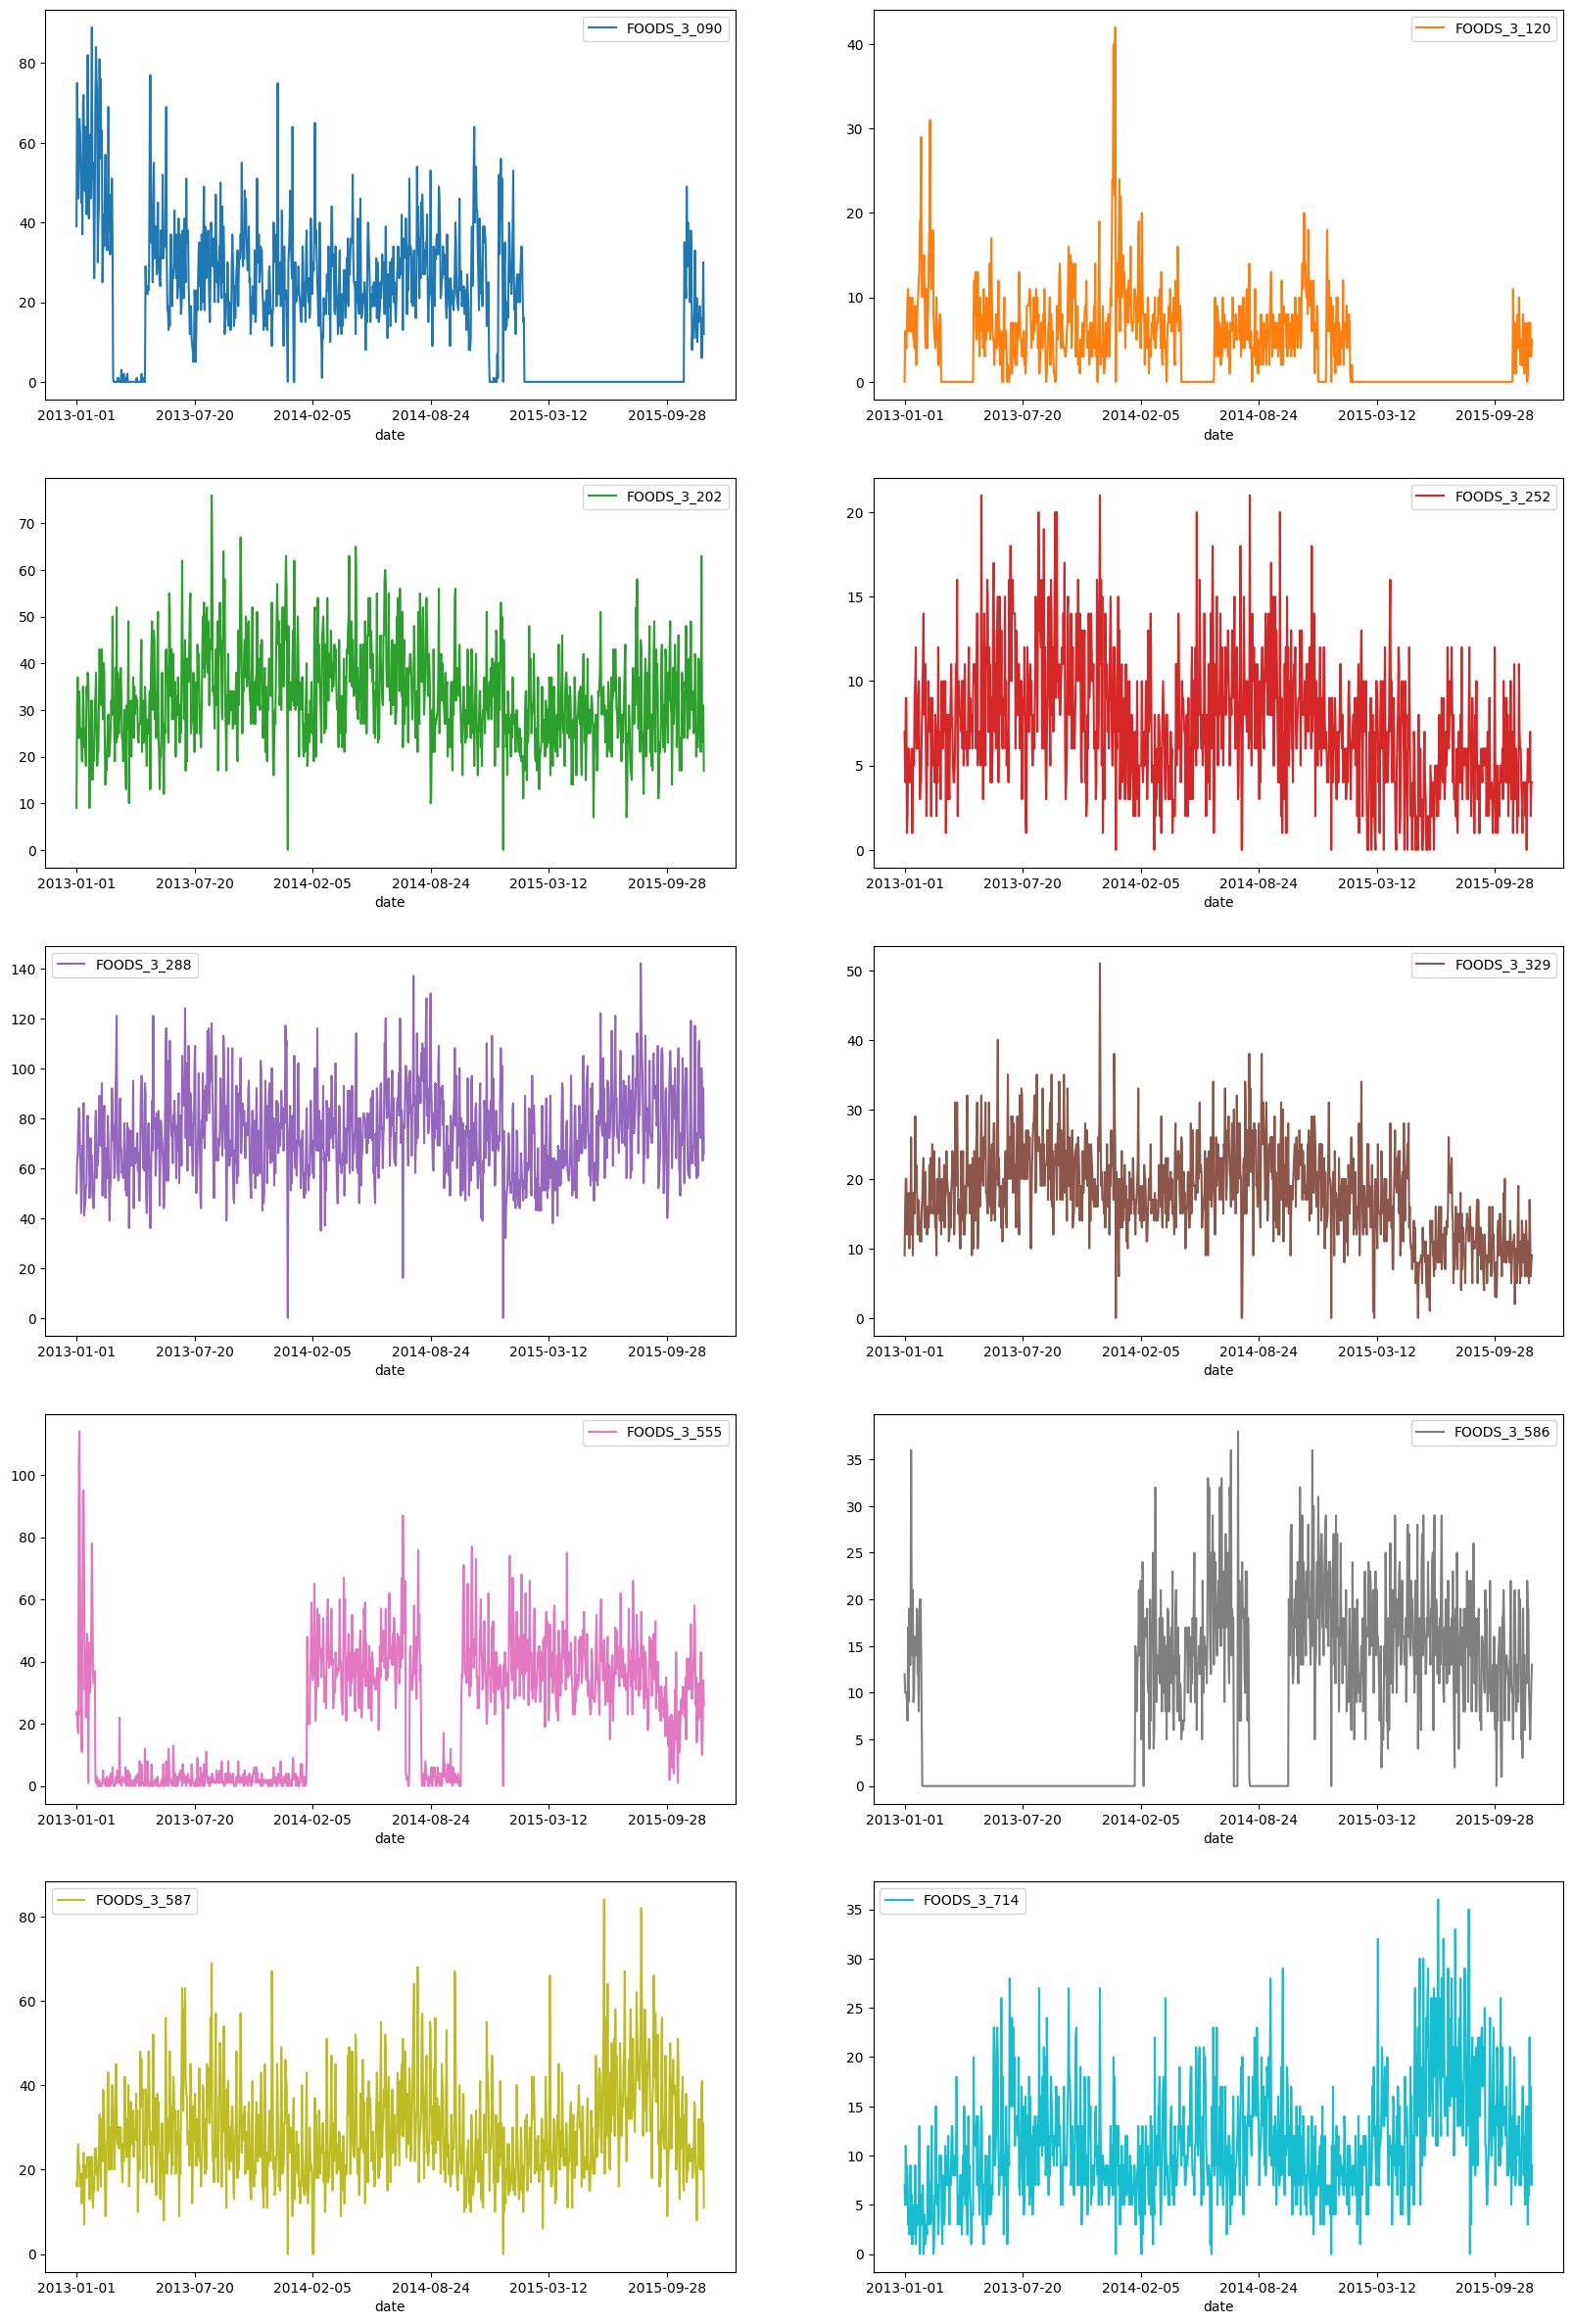

In [20]:
df.loc[df.store_id == 'CA_4'].groupby(['date','item_id']).sales.sum().unstack().plot(subplots = True,  layout = (5,2), sharex=False, figsize=(20,30));

Conclusions:

* There is a hierarchy of sales:
* There are new products at store level
* There might be an intermittent demand, though we don't know the cause: lack of demand, market withdrawal or stock breakage

Next steps: 

* Modelize at store-product level
* Create a variable that captures the effect of intermittent demand
* Use fast algorithms based on trees: XGBoost and/or LightGBM. These are the most popular models for this type of problem.

#### Price Trend by Product

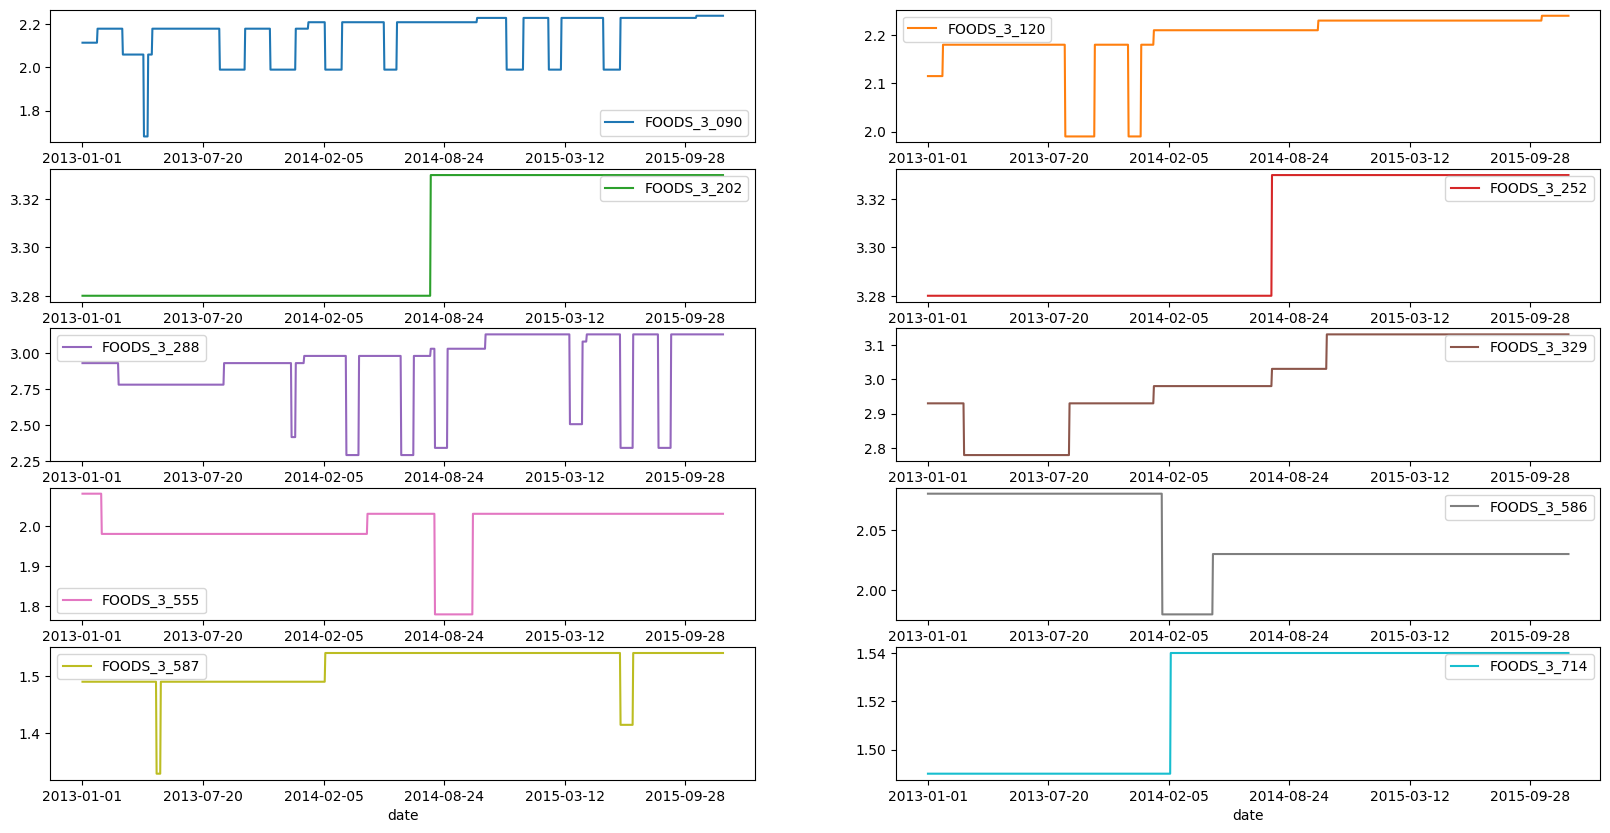

In [21]:
df.groupby(['date','item_id']).sell_price.mean().unstack().plot(subplots = True,  layout = (5,2), sharex=False, figsize=(20,10));

**Price Strategy Findings**

* Pricing policies vary significantly by product
* Promotions appear to be frequent
* Having a promotional calendar would be very useful for analysis

**Specific Patterns Observed**

* Some products show stable pricing
* Others demonstrate regular promotional cycles
* Step-wise price changes suggest planned price adjustments
* Different products operate in distinct price tiers

**Implications for Modeling**

* Price-related features should be included in forecasting models
* Need to account for:
  - Regular vs. promotional prices
  - Price change events
  - Price levels
  - Promotional periods

**Next Steps**

* Create features to capture promotional effects
* Analyze price elasticity
* Consider developing a promotional calendar
* Include price variables in demand forecasting models

#### Seasonality by Product

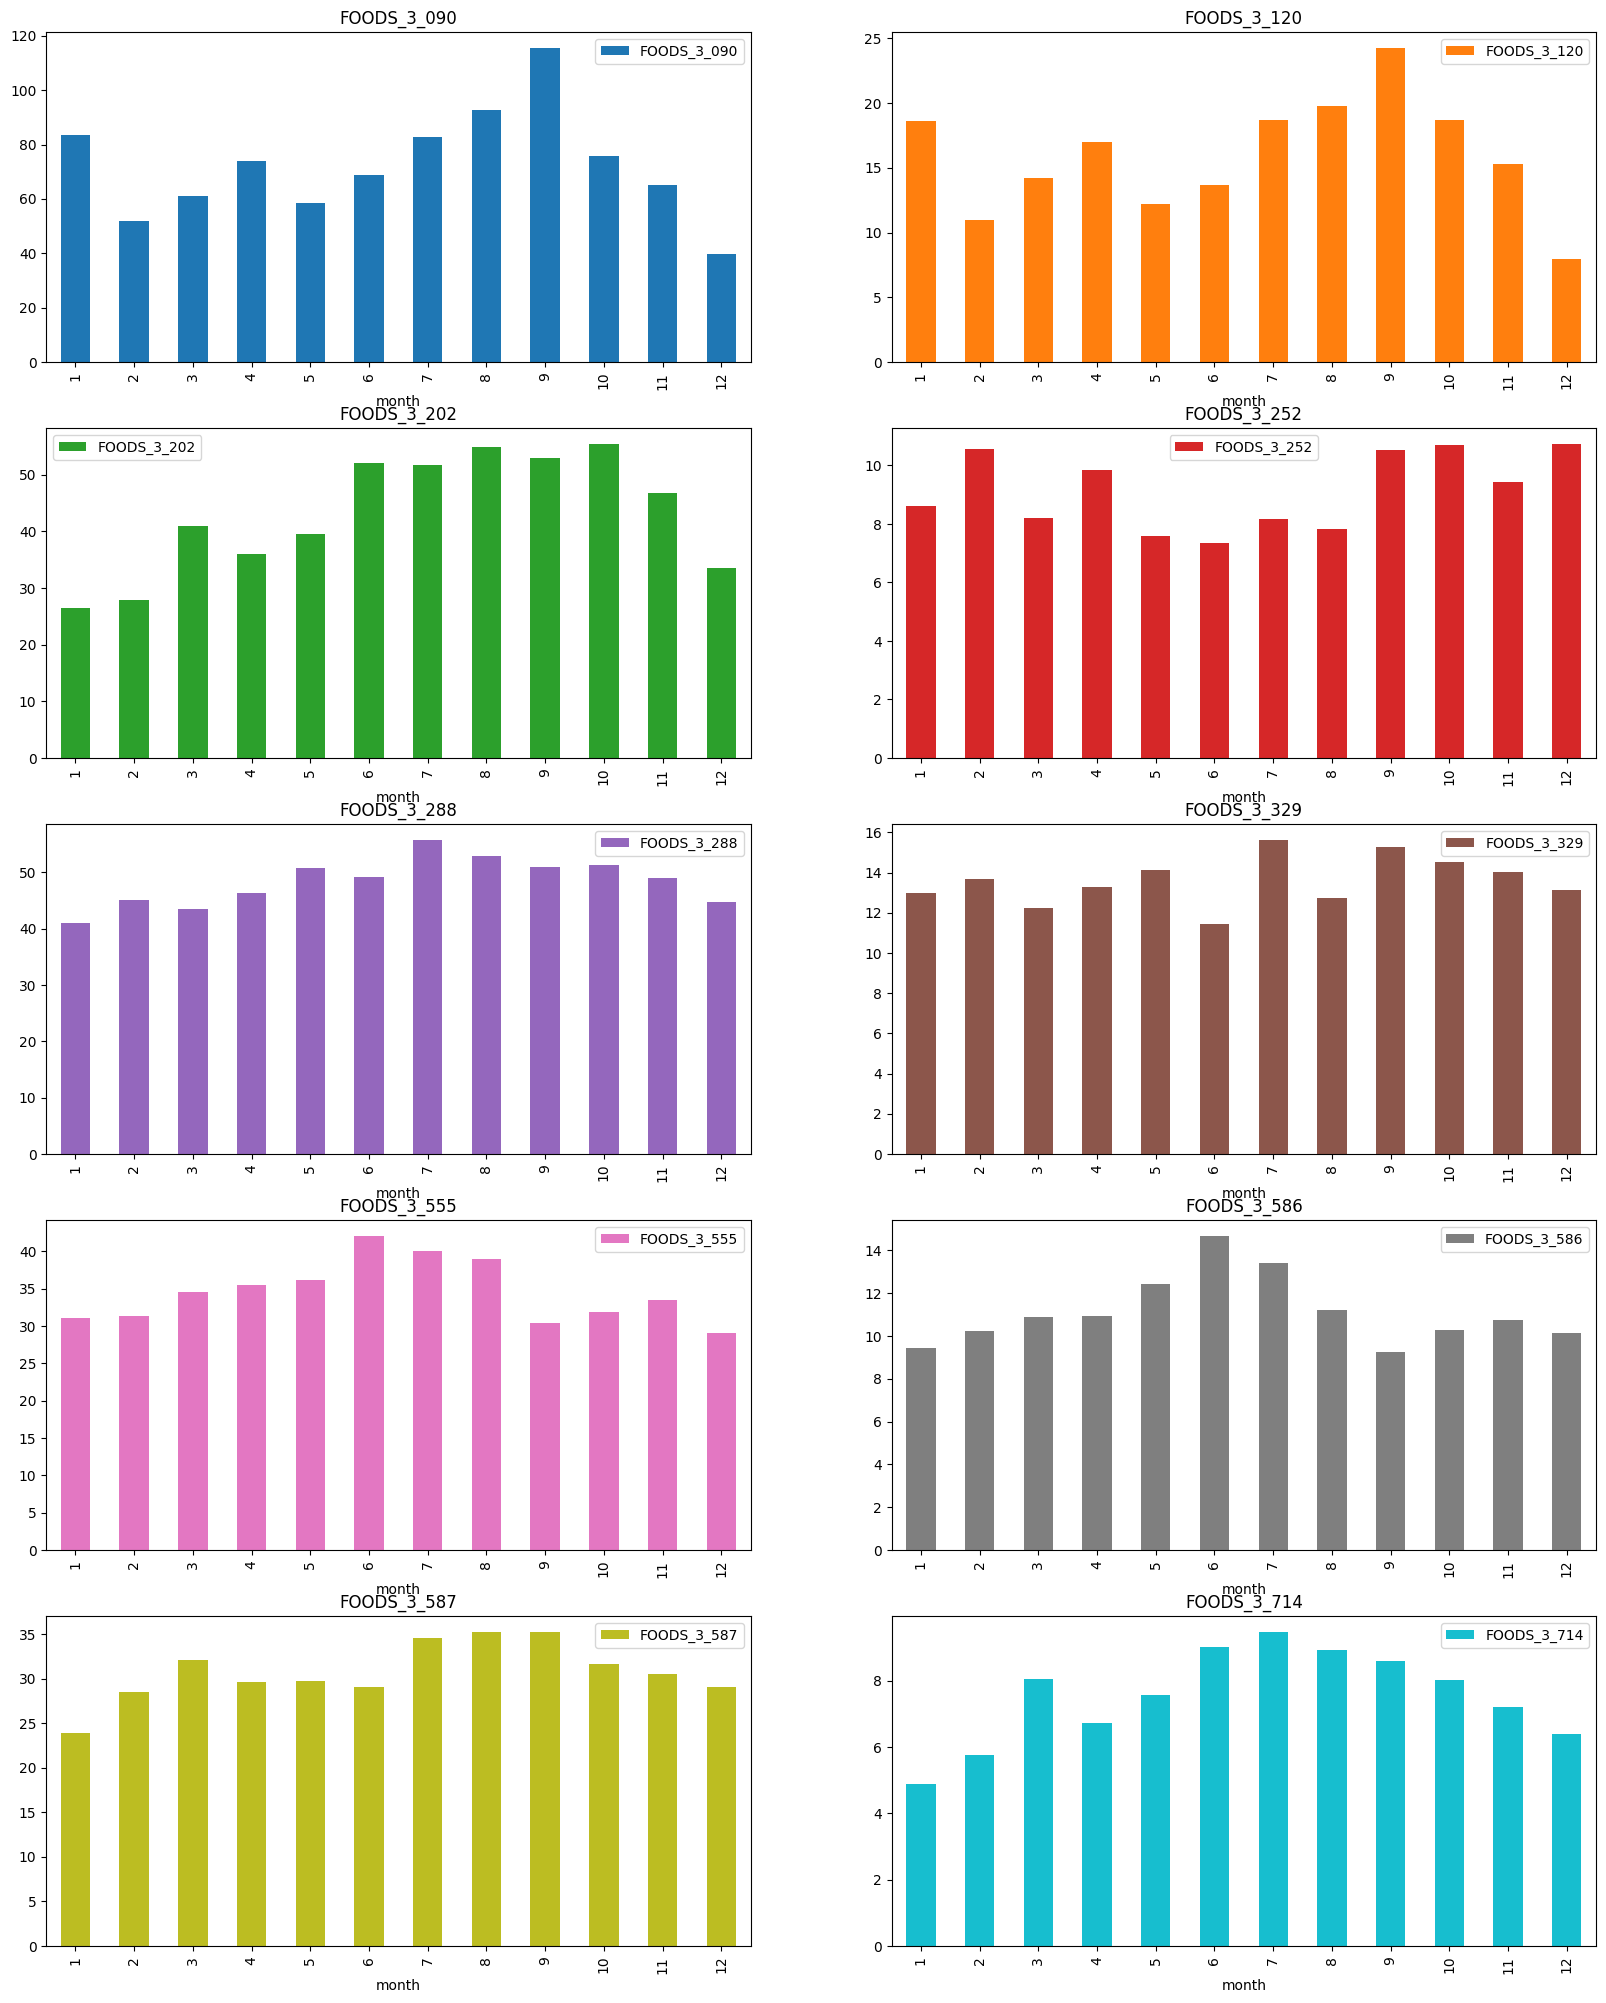

In [22]:
df.groupby(['month','item_id']).sales.mean().unstack().plot.bar(subplots = True,  layout = (6,2), sharex=False, figsize=(20,30));

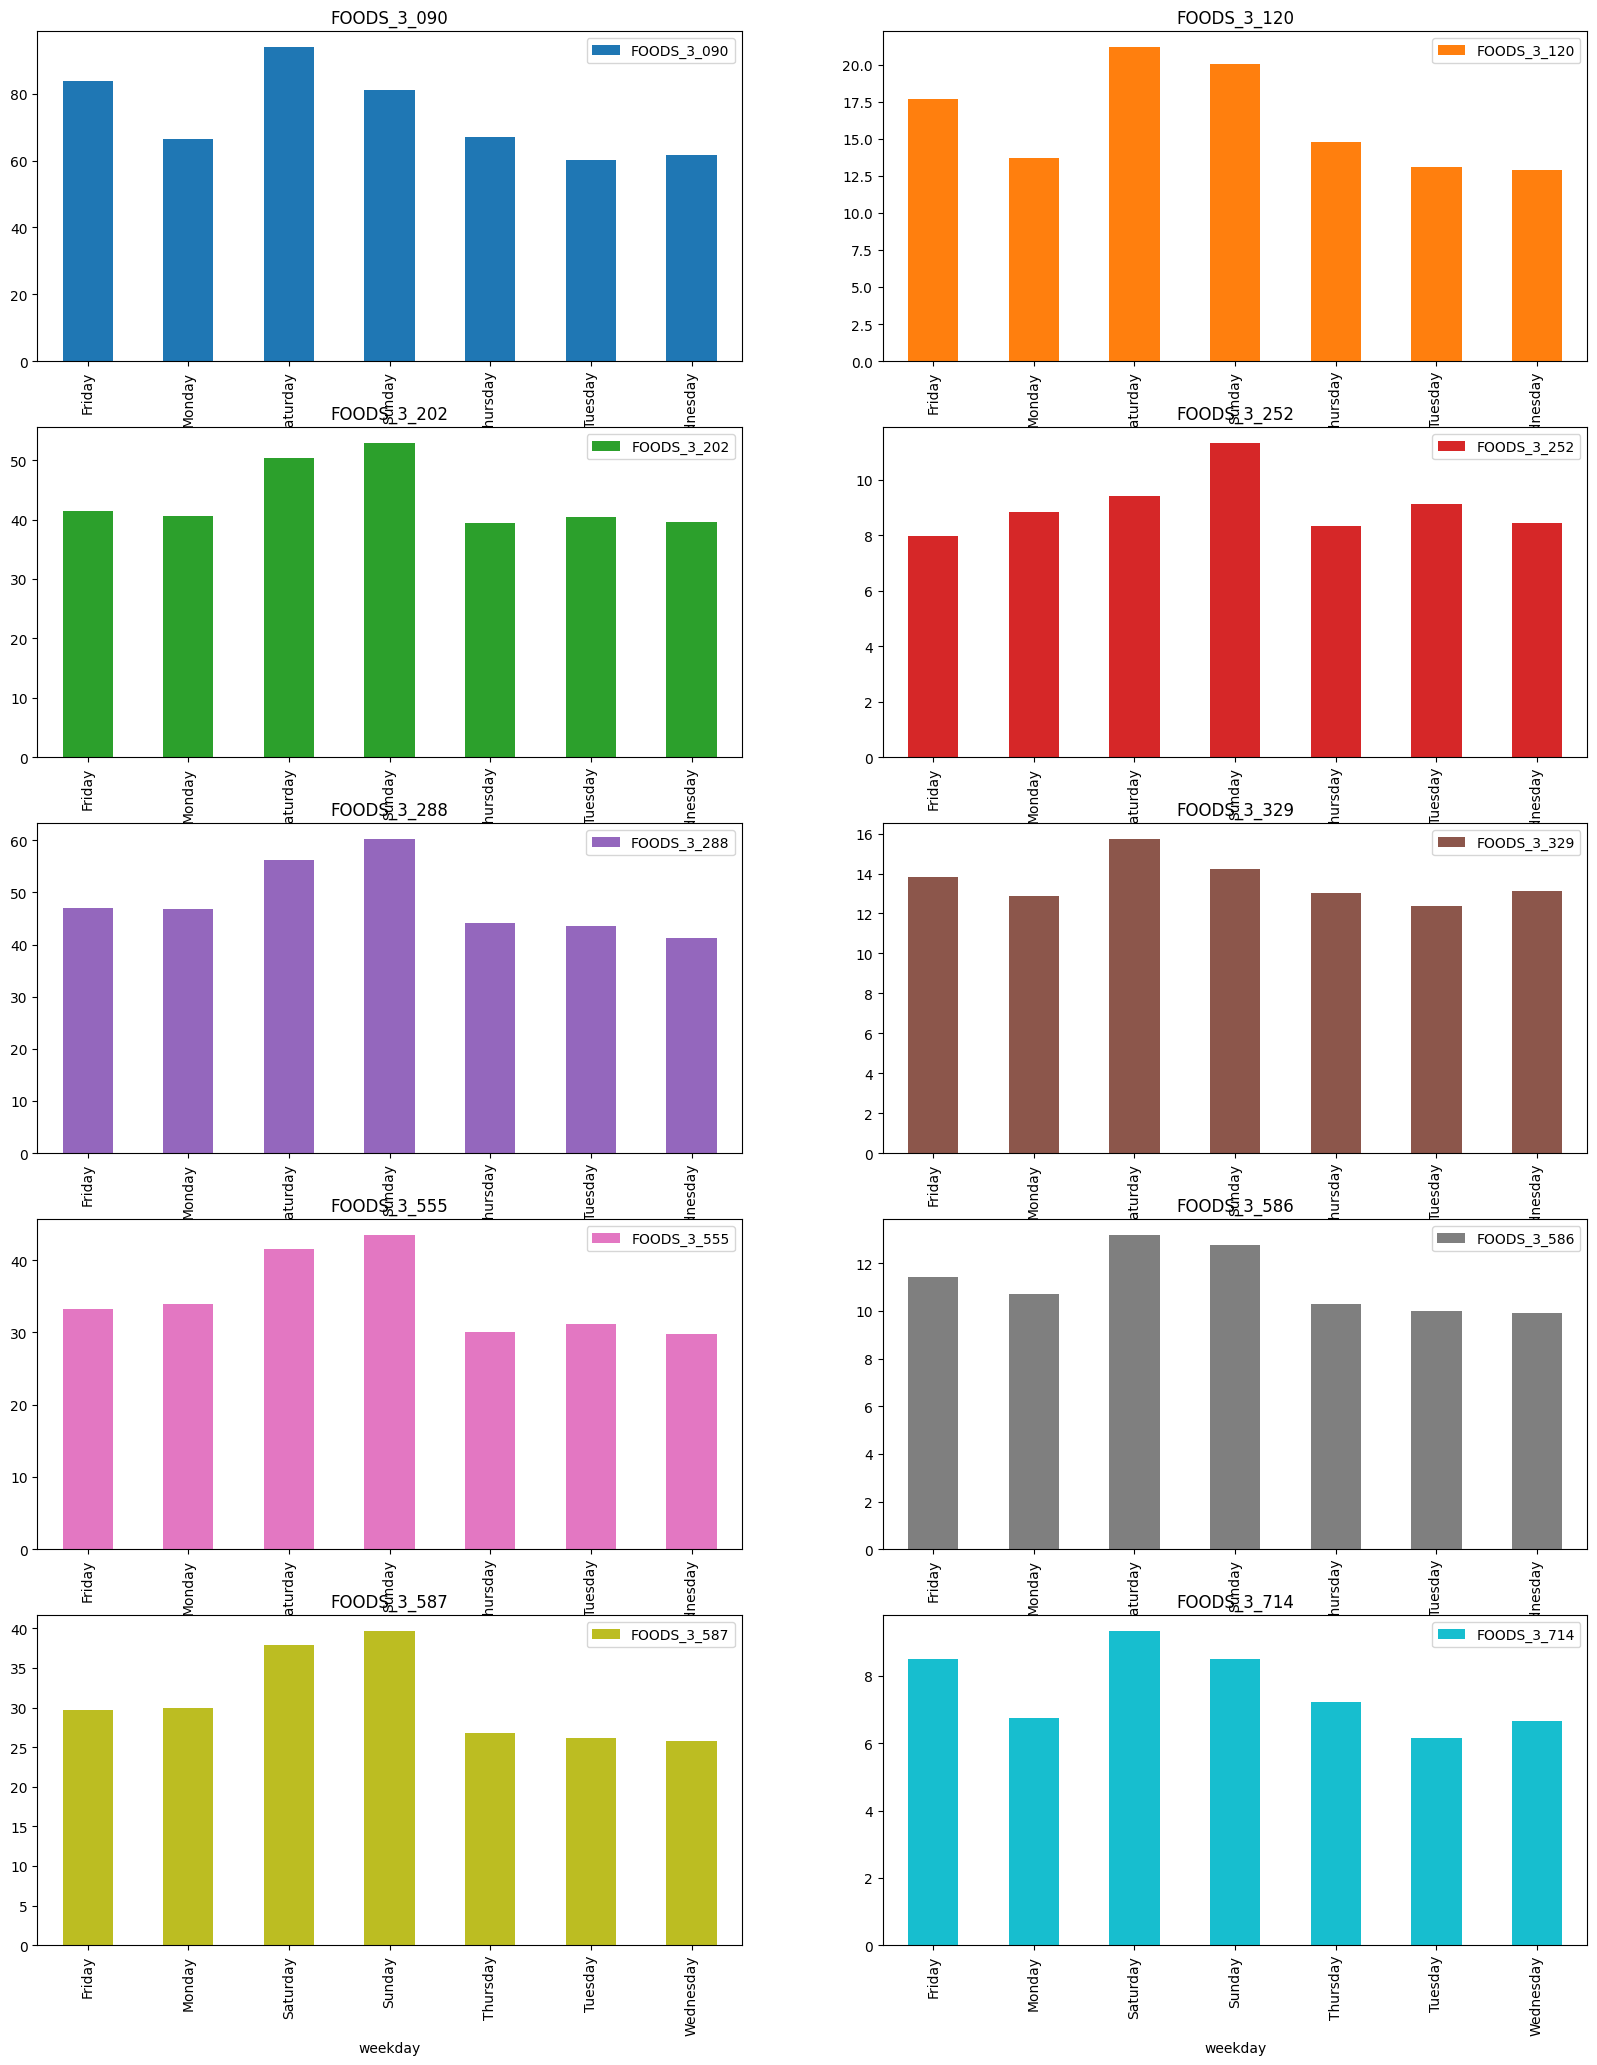

In [23]:
df.groupby(['weekday','item_id']).sales.mean().unstack().plot.bar(subplots = True,  layout = (6,2), sharex=False, figsize=(20,30));

#### Event Seasonality by Product

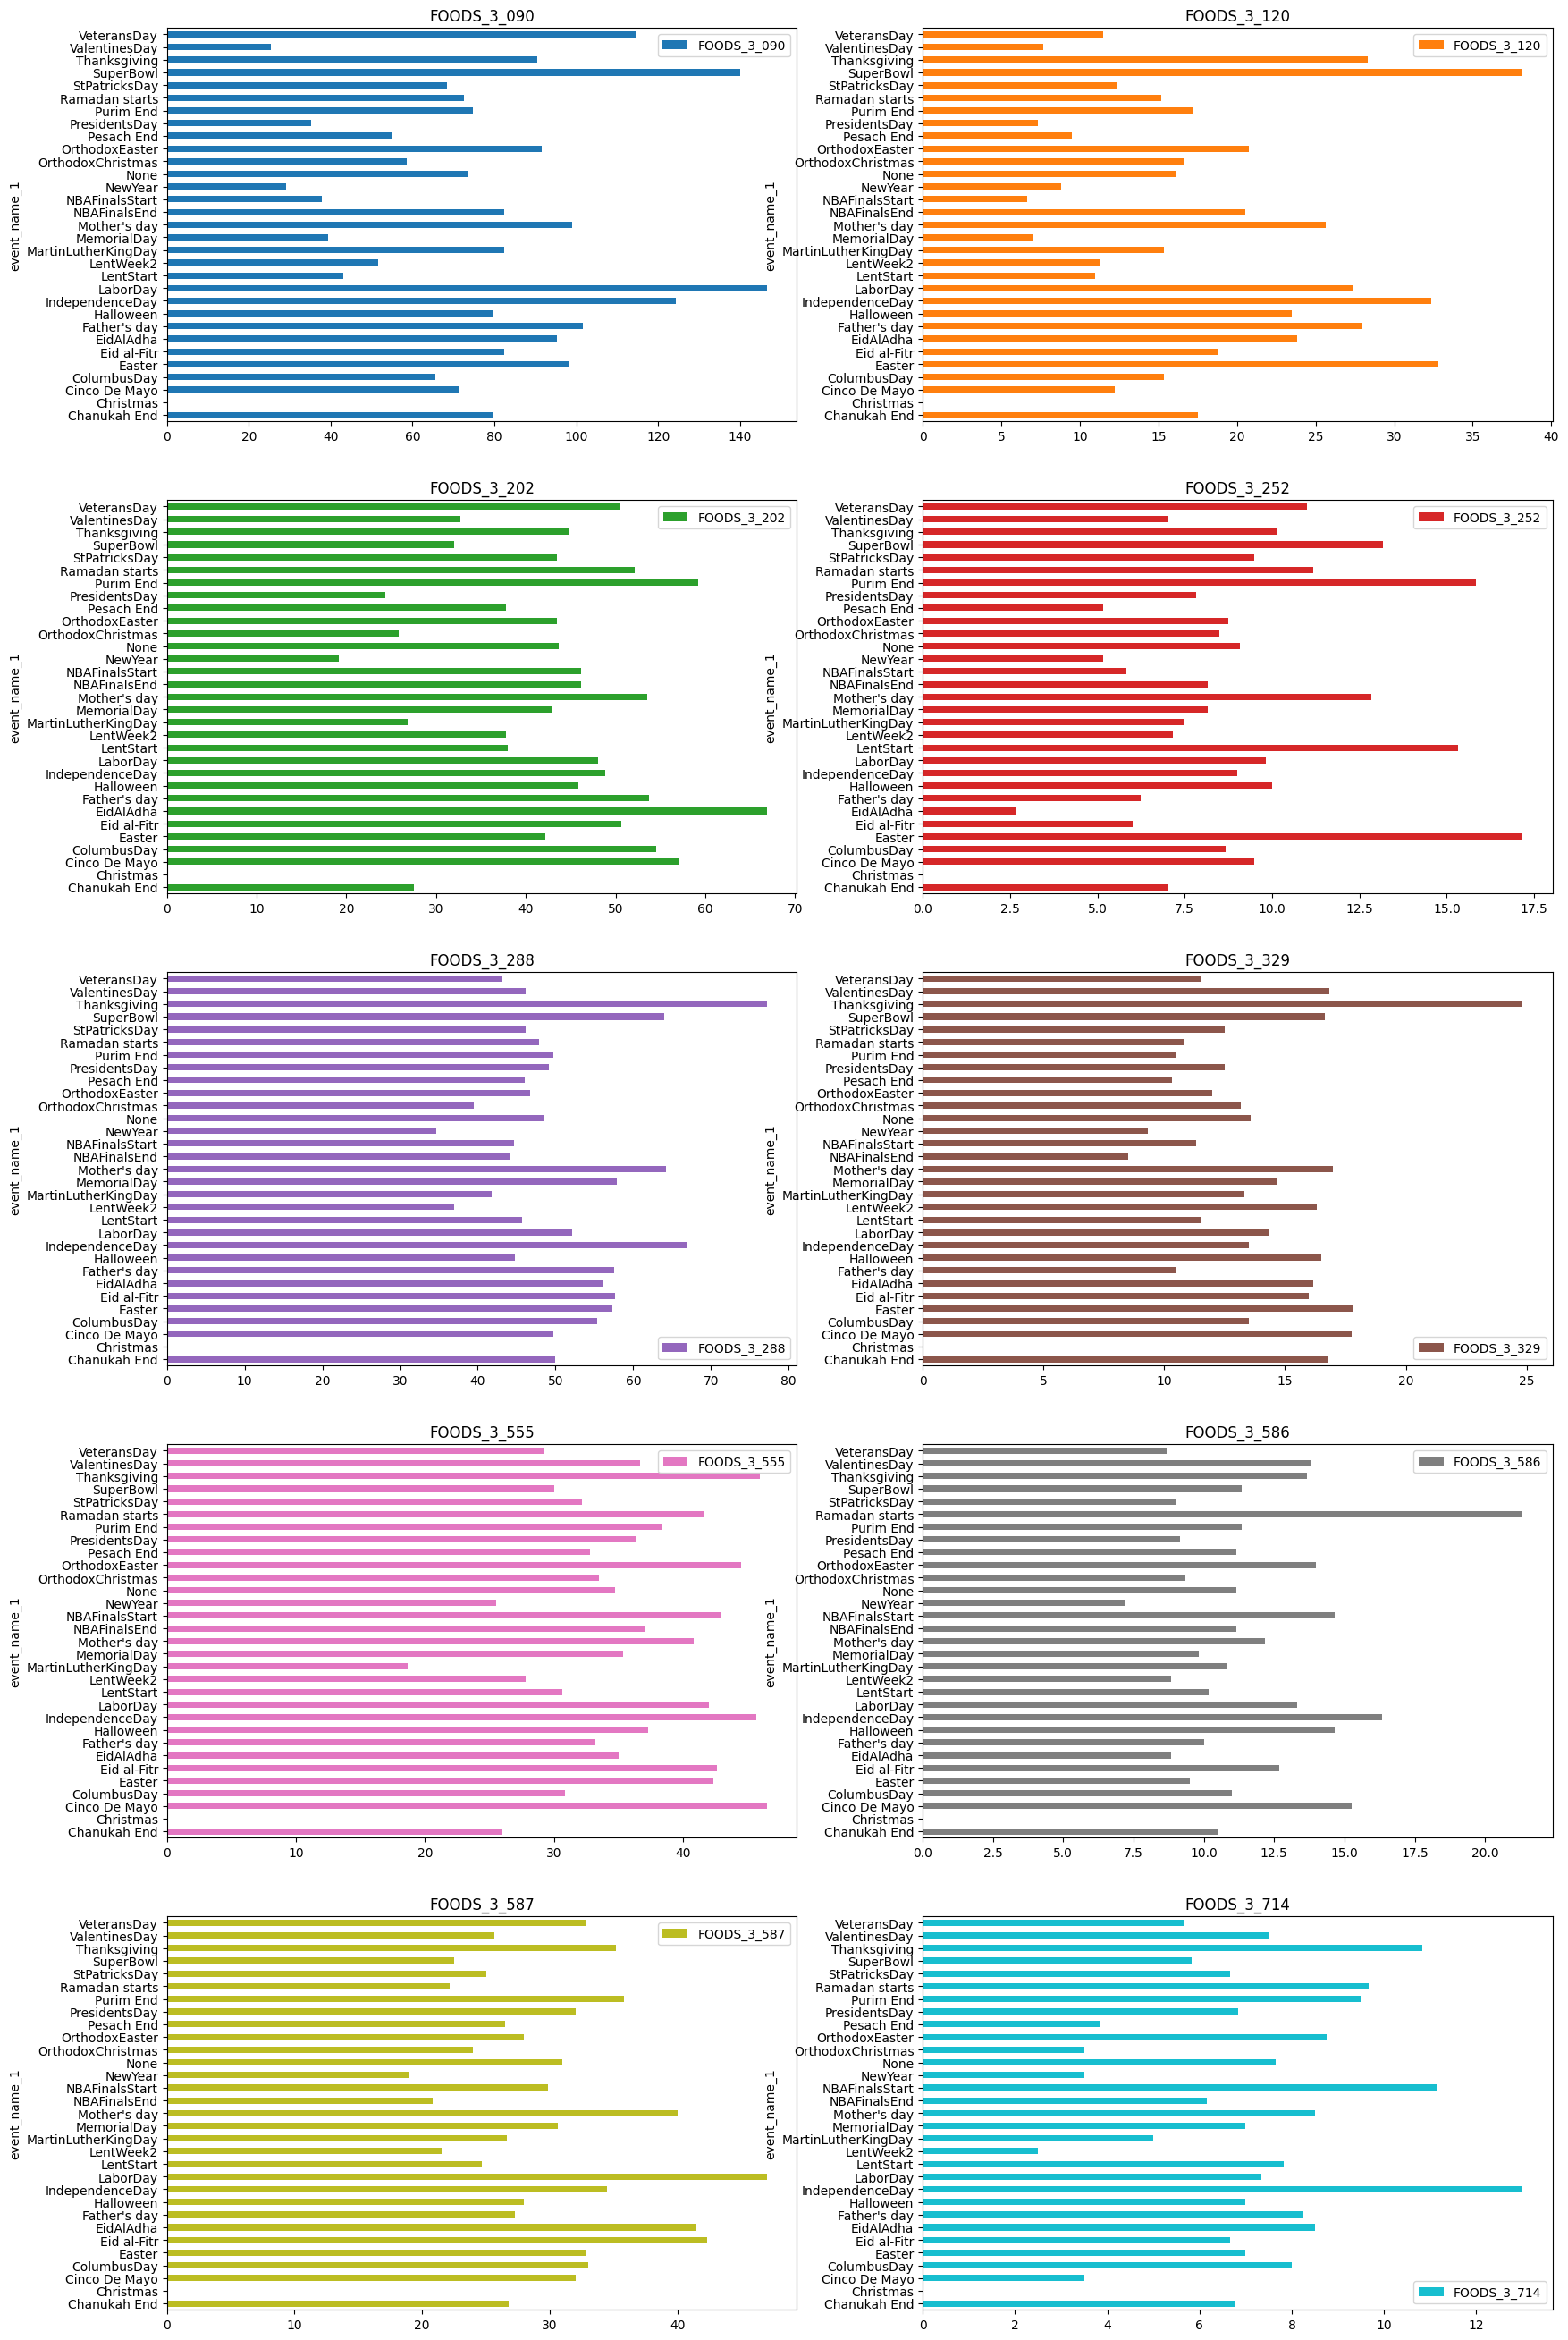

In [24]:
df.groupby(['event_name_1','item_id']).sales.mean().unstack().plot.barh(subplots = True,  layout = (6,2), sharex=False, figsize=(20,40));

#### Seasonality by Event Type

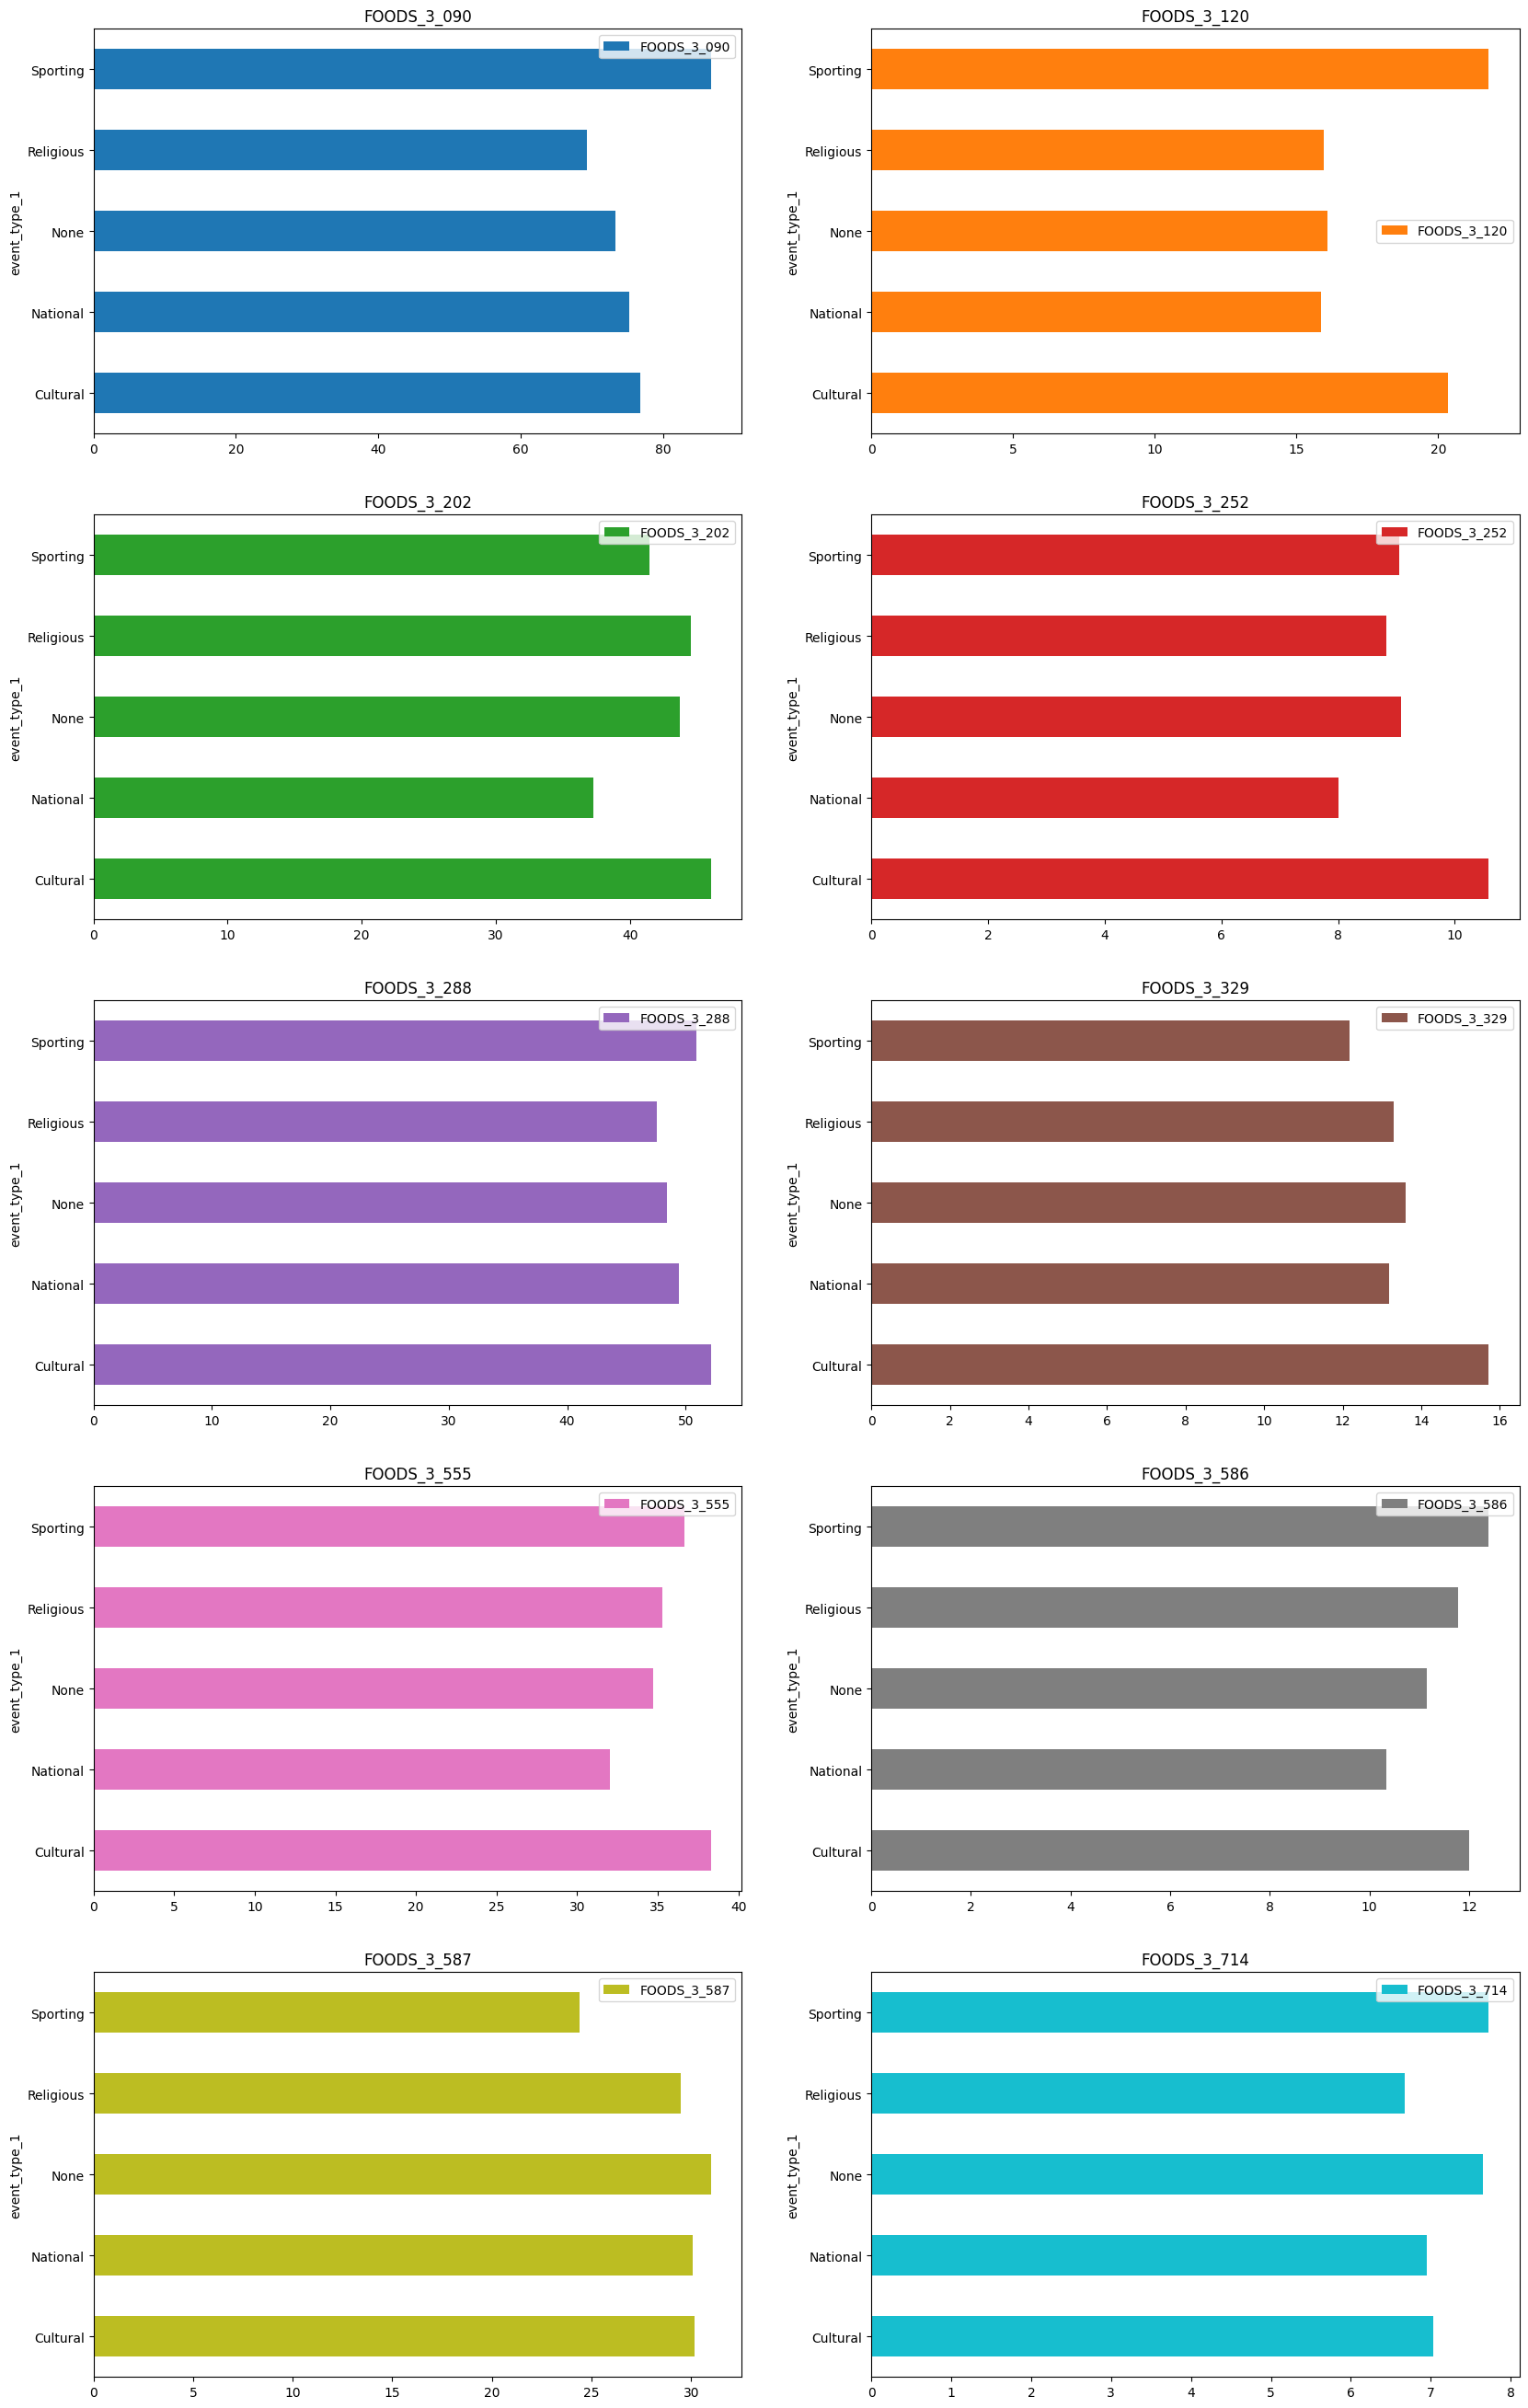

In [25]:
df.groupby(['event_type_1','item_id']).sales.mean().unstack().plot.barh(subplots = True,  layout = (6,2), sharex=False, figsize=(20,40));

Conclusions:

* All these variables seem to affect sales, which is good news because we have a lot of information to work with.

In [26]:
pd.set_option('display.max_rows', 5)

cat

,store_id,item_id,d,year,month,wday,weekday,event_name_1,event_type_1
date,,,,,,,,,
2013-01-01,CA_3,FOODS_3_090,d_704,2013,1,4,Tuesday,NewYear,National
2013-01-01,CA_3,FOODS_3_120,d_704,2013,1,4,Tuesday,NewYear,National
...,...,...,...,...,...,...,...,...,...
2015-11-30,CA_4,FOODS_3_587,d_1767,2015,11,3,Monday,None,None
2015-11-30,CA_4,FOODS_3_714,d_1767,2015,11,3,Monday,None,None


In [27]:
num

,wm_yr_wk,sales,sell_price
date,,,
2013-01-01,11249,0,1.25
2013-01-01,11249,33,1.25
...,...,...,...
2015-11-30,11544,11,1.58
2015-11-30,11544,9,1.58


## SAVE DATASETS AFTER EDA

In [28]:
# Define the paths for saving Parquet files
path_cat = TRANSFORMED_DATA_DIR / 'cat_result_eda.parquet'
path_num = TRANSFORMED_DATA_DIR / 'num_result_eda.parquet'

# Save the DataFrames as Parquet files
cat.to_parquet(path_cat)
num.to_parquet(path_num)

print("Datasets saved successfully in Parquet format.")

Datasets saved successfully in Parquet format.
